In [1]:
#Importing neccesary libraries

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image

import os


In [23]:
#To augment our images or transform them between a value of 0-1
train = ImageDataGenerator(1/255)
validation = ImageDataGenerator(1/255)

In [24]:
#Change the directories below to the correct ones (train and validation) on your system
train_dataset = train.flow_from_directory('C:\\Users\\HP 1011 x2\\Documents\\Curacel\\ML Damaged car task - Copy\\Train',
                                        target_size= (150,150),
                                         batch_size = 50,
                                         class_mode ='binary')

validation_dataset = train.flow_from_directory('C:\\Users\\HP 1011 x2\\Documents\\Curacel\\ML Damaged car task - Copy\\validation',
                                        target_size= (150,150),
                                         batch_size = 50,
                                         class_mode ='binary')

Found 1989 images belonging to 2 classes.
Found 2010 images belonging to 2 classes.


In [25]:
train_dataset.class_indices

{'Bad cars': 0, 'Good cars': 1}

In [90]:
#Creating our tensorflow model with 3 hidden layers

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu', input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu', input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(500, activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                   ])

In [91]:
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
             metrics =['accuracy'])

In [92]:
#Training the model
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 15,
                    epochs = 50,
                    validation_data = validation_dataset)

C:\Users\HP 1011 x2\AppData\Roaming\Python\Python38\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
15/15 [==============================] - 97s 6s/step - loss: 592.8644 - accuracy: 0.5196 - val_loss: 4.8843 - val_accuracy: 0.4975
Epoch 2/50
15/15 [==============================] - 111s 7s/step - loss: 0.7786 - accuracy: 0.6712 - val_loss: 1.0535 - val_accuracy: 0.6080
Epoch 3/50
15/15 [==============================] - 88s 6s/step - loss: 0.7041 - accuracy: 0.7347 - val_loss: 0.5260 - val_accuracy: 0.7532
Epoch 4/50
15/15 [==============================] - 121s 8s/step - loss: 0.8734 - accuracy: 0.7862 - val_loss: 4.2366 - val_accuracy: 0.5035
Epoch 5/50
15/15 [==============================] - 145s 10s/step - loss: 2.5194 - accuracy: 0.6671 - val_loss: 0.5929 - val_accuracy: 0.7050
Epoch 6/50
15/15 [==============================] - 133s 9s/step - loss: 0.4262 - accuracy: 0.8093 - val_loss: 0.4874 - val_accuracy: 0.7856
Epoch 7/50
15/15 [==============================] - 136s 9s/step - loss: 0.4363 - accuracy: 0.8214 - val_loss: 12.3577 - val_accuracy: 0.4980
Epoch 8/50


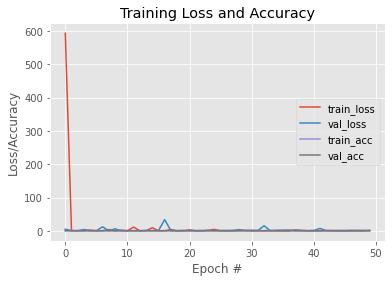

In [107]:
#This is to show our model training curve

N =50
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), model_fit.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), model_fit.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), model_fit.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), model_fit.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("Tensorflow_model")

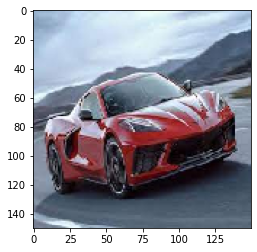

Good Car


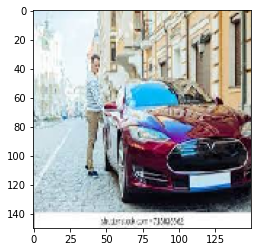

Damaged Car


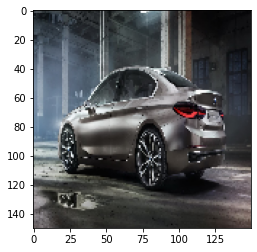

Good Car


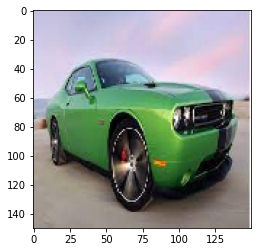

Damaged Car


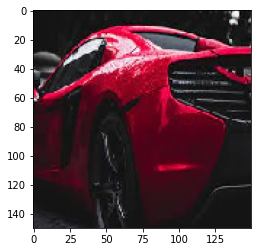

Damaged Car


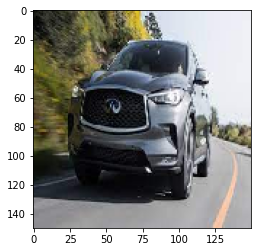

Good Car


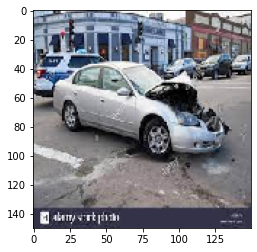

Damaged Car


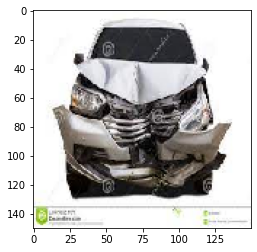

Good Car


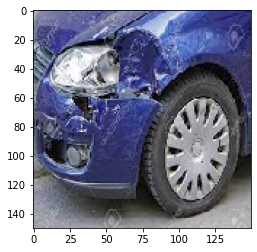

Damaged Car


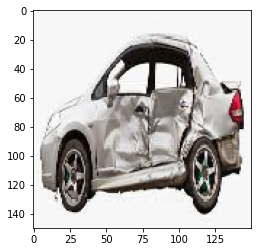

Good Car


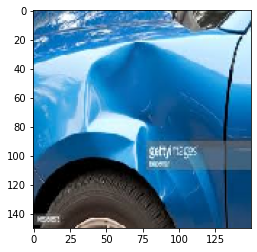

Damaged Car


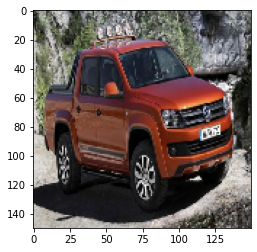

Good Car


In [104]:
#This is to test our model; however, create a directory with the test files on your PC and change the directory below to it
dir_path = 'C:\\Users\\HP 1011 x2\\Documents\\Curacel\\ML Damaged car task - Copy\\Test'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i,target_size =(150,150))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x= np.expand_dims(x, axis= 0)
    test_images = np.vstack([x])
    
    val=model.predict(test_images)
    
    if val >=0.90:
        print("Good Car")
    else:
        print("Damaged Car")

In [94]:
#Code to show our test accuracy
loss, acc = model.evaluate(train_dataset, verbose=0)
print(f"test accuracy {acc*100}")

test accuracy 99.0447461605072


In [98]:
##Saving the model in h5 format
#model.save('C:\\Users\\HP 1011 x2\\Documents\\Curacel\\Curacel Tensorflow models\\Cardetect.h5')